<a href="https://colab.research.google.com/github/hyojunyee/kita_2404/blob/main/m3_%EB%B6%84%EC%84%9D%20%EB%9D%BC%EC%9D%B4%EB%B8%8C%EB%9F%AC%EB%A6%AC/Task/Task_0531_%ED%92%80%EC%9D%B4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task1_0531. auto_mpg 데이터셋을 전처리 및 탐색적 분석 수행 후 mpg을 예측하는 회귀모델을 생성하고 일반화 성능 평가를 수행하세요.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
# 데이터 불러오기
file_path = '/content/drive/MyDrive/kdt_240424/m3_분석라이브러리/m_3_datas/auto-mpg.csv'
# file_path = 'mtcars.csv'
df = pd.read_csv(file_path)

Mounted at /content/drive


In [ ]:
# 결측값 처리
# 데이터 전처리가 필요하다.
df = df.replace('?', np.nan)
df['horsepower'] = df['horsepower'].astype(float)
df = df.dropna()

df = df.astype({'horsepower': 'float64'})

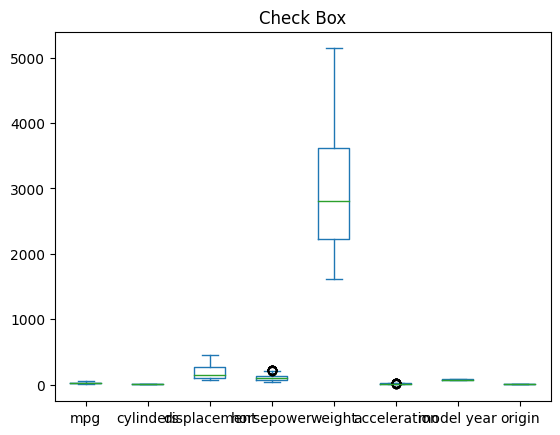

In [ ]:
df.plot.box()
plt.title('Check Box')
plt.show()
df.drop('car name', axis=1, inplace=True)

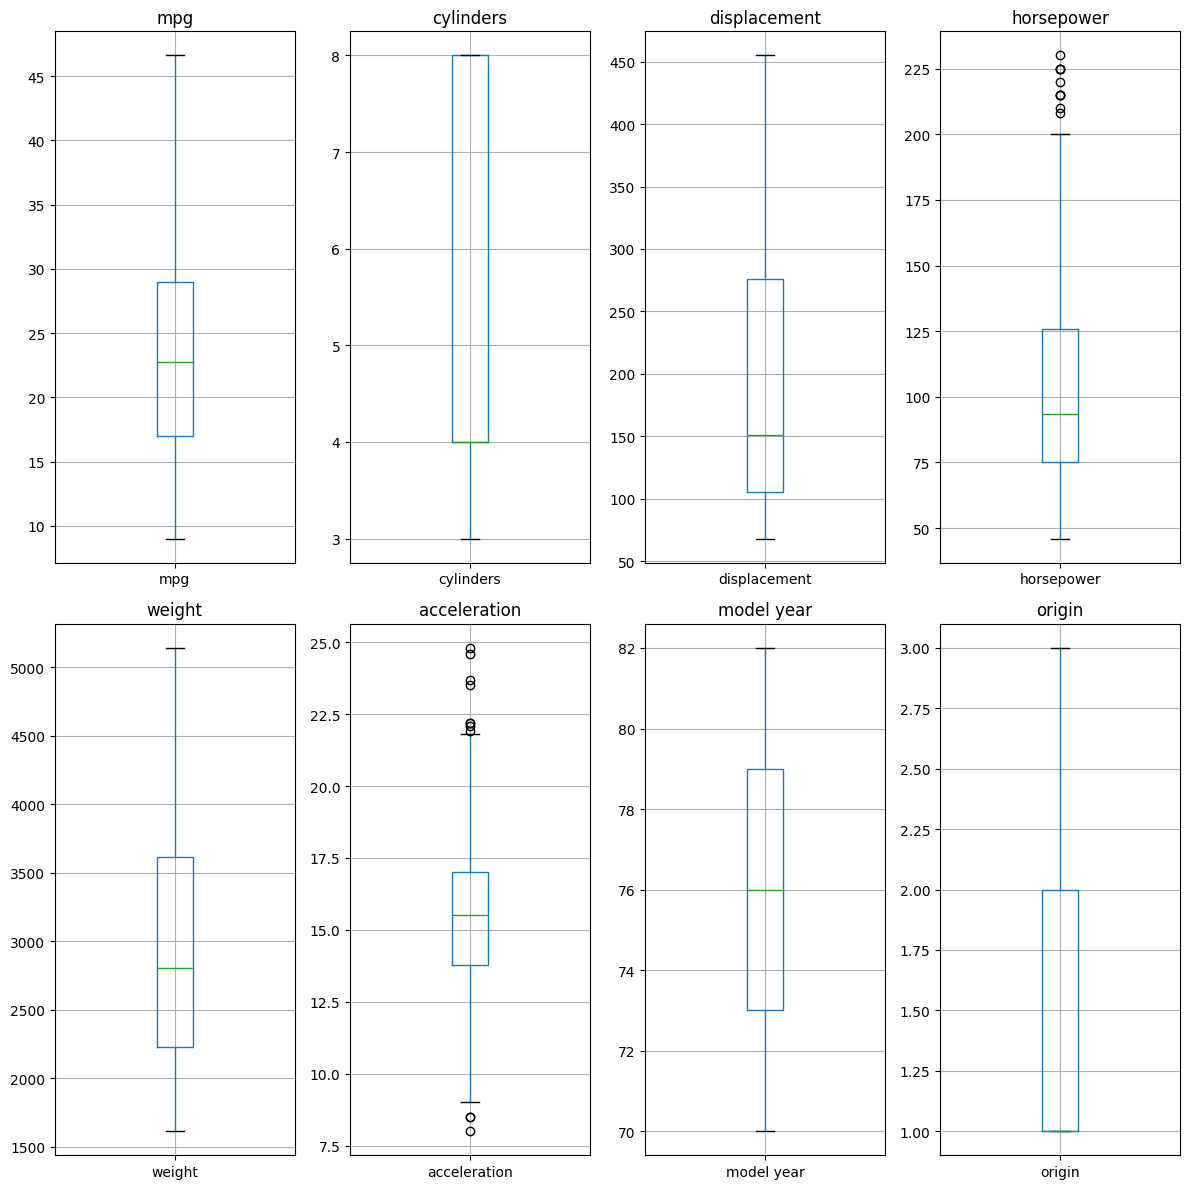

                   mpg  cylinders  displacement  horsepower    weight  \
mpg           1.000000  -0.777618     -0.805127   -0.778427 -0.832244   
cylinders    -0.777618   1.000000      0.950823    0.842983  0.897527   
displacement -0.805127   0.950823      1.000000    0.897257  0.932994   
horsepower   -0.778427   0.842983      0.897257    1.000000  0.864538   
weight       -0.832244   0.897527      0.932994    0.864538  1.000000   
acceleration  0.423329  -0.504683     -0.543800   -0.689196 -0.416839   
model year    0.580541  -0.345647     -0.369855   -0.416361 -0.309120   
origin        0.565209  -0.568932     -0.614535   -0.455171 -0.585005   

              acceleration  model year    origin  
mpg               0.423329    0.580541  0.565209  
cylinders        -0.504683   -0.345647 -0.568932  
displacement     -0.543800   -0.369855 -0.614535  
horsepower       -0.689196   -0.416361 -0.455171  
weight           -0.416839   -0.309120 -0.585005  
acceleration      1.000000    0.2903

In [ ]:
# 데이터프레임의 열 수
num_columns = len(df.columns)

# 그래프의 크기 설정
plt.figure(figsize =(12, 12))

# 각 열에 대한 박스풀롯을 그립니다
for i, column in enumerate(df.columns):
    plt.subplot(2, 4, i+1)
    df.boxplot(column=column)
    plt.title(column)

# 레이아웃을 조정합니다
plt.tight_layout()
plt.show()

correlation_matrix = df.corr()
print(correlation_matrix, '\n')

In [ ]:
target_variable = 'mpg'
correlation_threshold = 0.5
correlation_features = correlation_matrix[target_variable][abs(correlation_matrix[target_variable]) > correlation_threshold].index.tolist()
print(correlation_features)

['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'model year', 'origin']


In [ ]:
from sklearn.preprocessing import StandardScaler

analysis_df = df[correlation_features]
target_variable = 'mpg'

# print(analysis_df.head())

# 데이터 표준화
scaler = StandardScaler()
scaled_features = scaler.fit_transform(analysis_df.drop(columns = [target_variable]))

# print(scaled_features)

# 데이터 프레임으로 전환
scaled_df = pd.DataFrame(scaled_features, columns = analysis_df.columns.drop(target_variable))
scaled_df[target_variable] = analysis_df[target_variable].values
print(scaled_df)

     cylinders  displacement  horsepower    weight  model year    origin   mpg
0     1.483947      1.077290    0.664133  0.620540   -1.625315 -0.716641  18.0
1     1.483947      1.488732    1.574594  0.843334   -1.625315 -0.716641  15.0
2     1.483947      1.182542    1.184397  0.540382   -1.625315 -0.716641  18.0
3     1.483947      1.048584    1.184397  0.536845   -1.625315 -0.716641  16.0
4     1.483947      1.029447    0.924265  0.555706   -1.625315 -0.716641  17.0
..         ...           ...         ...       ...         ...       ...   ...
387  -0.864014     -0.520637   -0.480448 -0.221125    1.636410 -0.716641  27.0
388  -0.864014     -0.932079   -1.364896 -0.999134    1.636410  0.526382  44.0
389  -0.864014     -0.568479   -0.532474 -0.804632    1.636410 -0.716641  32.0
390  -0.864014     -0.712005   -0.662540 -0.415627    1.636410 -0.716641  28.0
391  -0.864014     -0.721574   -0.584501 -0.303641    1.636410 -0.716641  31.0

[392 rows x 7 columns]
